In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from datetime import datetime, timedelta

# Define the currency pair
ticker = "EURUSD=X"   # EUR to USD
# Get last 3 years of daily data
end_date = datetime.now()
years=3
start_date = end_date - timedelta(days=years*365)

# Download data
eurusd = yf.download(ticker, start=start_date, end=end_date)#, progress=False)

prices = eurusd['Close']


/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_97318/3957412088.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eurusd = yf.download(ticker, start=start_date, end=end_date)#, progress=False)
[*********************100%***********************]  1 of 1 completed


In [2]:
display(type(prices))
display(prices.columns)
display(prices)

pandas.core.frame.DataFrame

Index(['EURUSD=X'], dtype='object', name='Ticker')

Ticker,EURUSD=X
Date,
2022-12-13,1.054174
2022-12-14,1.062665
2022-12-15,1.067635
2022-12-16,1.064056
2022-12-19,1.058504
...,...
2025-12-08,1.164022
2025-12-09,1.164144
2025-12-10,1.162831


In [3]:
# Augmented Dickey-Fuller Test for Stationarity
def perform_adf_test(series, title):
    print(f"\nADF Test for {title}:")
    result = adfuller(series.dropna())

    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

    if result[1] < 0.05:
        print("Series is stationary (reject null hypothesis)")
    else:
        print("Series is non-stationary (fail to reject null hypothesis)")

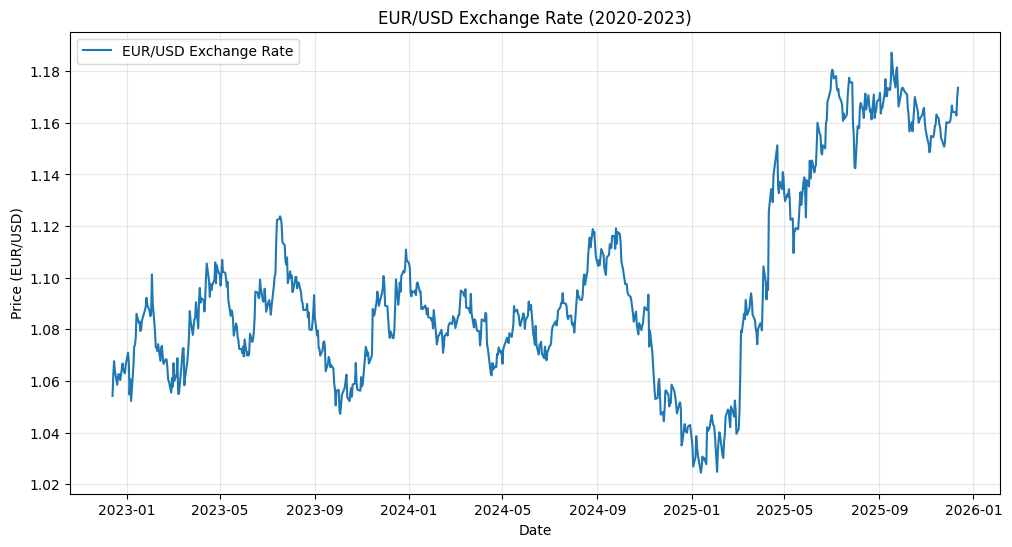

In [4]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(prices, label='EUR/USD Exchange Rate')
plt.title('EUR/USD Exchange Rate (2020-2023)')
plt.xlabel('Date')
plt.ylabel('Price (EUR/USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [5]:

# ADF Test for stationarity
adf_result = adfuller(prices.dropna())
print("ADF Test Results:")
print(f"Test Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"  {key}: {value:.4f}")

# Interpretation
if adf_result[1] <= 0.05:
    print("\n✅ The series is STATIONARY (p-value <= 0.05)")
else:
    print("\n❌ The series is NON-STATIONARY (p-value > 0.05)")
    print("   We need to make it stationary for better predictions")

ADF Test Results:
Test Statistic: -1.4288
p-value: 0.5684
Critical Values:
  1%: -3.4388
  5%: -2.8653
  10%: -2.5687

❌ The series is NON-STATIONARY (p-value > 0.05)
   We need to make it stationary for better predictions


In [6]:
# Method 1: Differencing (most common for financial data)
prices_diff = prices.diff().dropna()

# Method 2: Percentage change (returns)
returns = prices.pct_change().dropna() * 100  # In percentage

display(prices_diff.head())
display(returns.head())

Ticker,EURUSD=X
Date,
2022-12-14,0.008491
2022-12-15,0.004969
2022-12-16,-0.003579
2022-12-19,-0.005553
2022-12-20,0.002955


Ticker,EURUSD=X
Date,
2022-12-14,0.805502
2022-12-15,0.467632
2022-12-16,-0.335184
2022-12-19,-0.521838
2022-12-20,0.279164


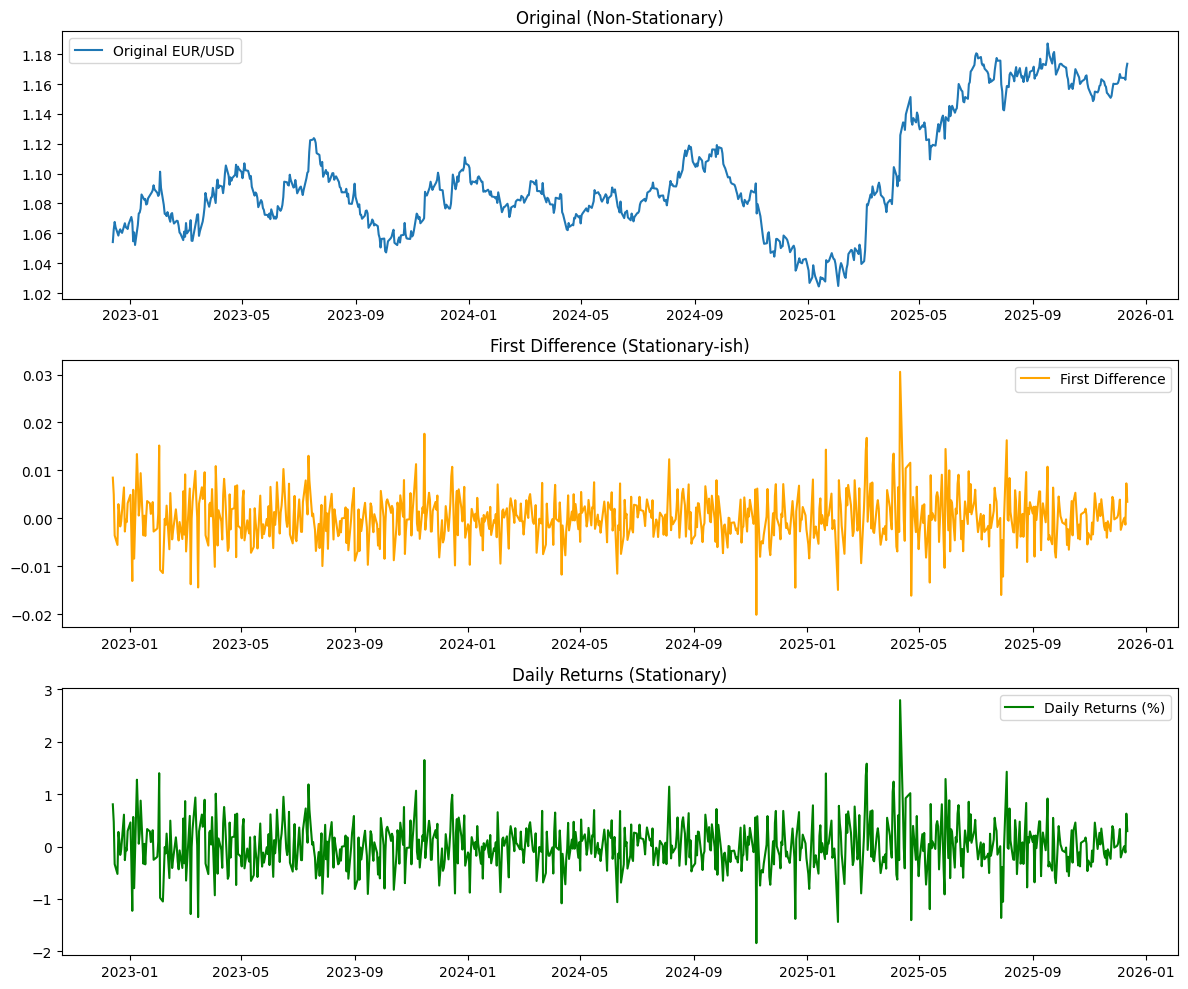

Returns p-value: 0.000000
✅ Returns are stationary - good for modeling!


In [7]:

# Plot original vs stationary data
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Original data
axes[0].plot(prices, label='Original EUR/USD')
axes[0].set_title('Original (Non-Stationary)')
axes[0].legend()

# First difference
axes[1].plot(prices_diff, label='First Difference', color='orange')
axes[1].set_title('First Difference (Stationary-ish)')
axes[1].legend()

# Returns
axes[2].plot(returns, label='Daily Returns (%)', color='green')
axes[2].set_title('Daily Returns (Stationary)')
axes[2].legend()

plt.tight_layout()
plt.show()

# Test if returns are stationary
returns_adf = adfuller(returns.dropna())
print(f"Returns p-value: {returns_adf[1]:.6f}")
if returns_adf[1] <= 0.05:
    print("✅ Returns are stationary - good for modeling!")

In [8]:
# Perform ADF test on both series
perform_adf_test(prices_diff, "Prices (First Difference)")
perform_adf_test(returns, "Returns (First Difference)")


ADF Test for Prices (First Difference):
ADF Statistic: -28.8198
p-value: 0.0000
Critical Values:
	1%: -3.4388
	5%: -2.8653
	10%: -2.5687
Series is stationary (reject null hypothesis)

ADF Test for Returns (First Difference):
ADF Statistic: -28.7896
p-value: 0.0000
Critical Values:
	1%: -3.4388
	5%: -2.8653
	10%: -2.5687
Series is stationary (reject null hypothesis)


# 2 Return (%) vs Difference tests

In [9]:
# Method 1: Difference
diff = prices.diff().dropna()

# Method 2: Returns
returns = prices.pct_change().dropna()

# Test stationarity for all three
print("ADF TEST RESULTS (p-values):")
print("=" * 50)

# Original prices
adf_original = adfuller(prices.dropna())
print(f"Original prices:     {adf_original[1]:.10f}")

# Differences
adf_diff = adfuller(diff.dropna())
print(f"First difference:    {adf_diff[1]:.10f}")

# Returns
adf_returns = adfuller(returns.dropna())
print(f"Returns:             {adf_returns[1]:.10f}")

# Interpretation
print("\n" + "=" * 50)
print("INTERPRETATION:")
print("p-value ≤ 0.05 → Stationary ✅")
print("p-value > 0.05 → Non-stationary ❌")
print("=" * 50)

if adf_original[1] > 0.05:
    print("Original prices → NON-STATIONARY ❌ (has trends)")
    
if adf_diff[1] <= 0.05:
    print("First difference → STATIONARY ✅ (usually)")
else:
    print("First difference → MAY need more differencing")

if adf_returns[1] <= 0.05:
    print("Returns → STATIONARY ✅ (good for modeling)")

ADF TEST RESULTS (p-values):
Original prices:     0.5684166175
First difference:    0.0000000000
Returns:             0.0000000000

INTERPRETATION:
p-value ≤ 0.05 → Stationary ✅
p-value > 0.05 → Non-stationary ❌
Original prices → NON-STATIONARY ❌ (has trends)
First difference → STATIONARY ✅ (usually)
Returns → STATIONARY ✅ (good for modeling)


## 6. Autocorrelation and Partial Autocorrelation

Analogy: When you're listening to an echo in a cave, the sound correlates with itself after a delay. Autocorrelation measures how today's price correlates with yesterday's, 2 days ago, etc.

What is Autocorrelation?

Measures how today's EUR/USD price relates to yesterday's price (lag 1), 2 days ago (lag 2), etc.
ACF (Autocorrelation Function): Total correlation at each lag
PACF (Partial Autocorrelation): Direct correlation (removes indirect effects)



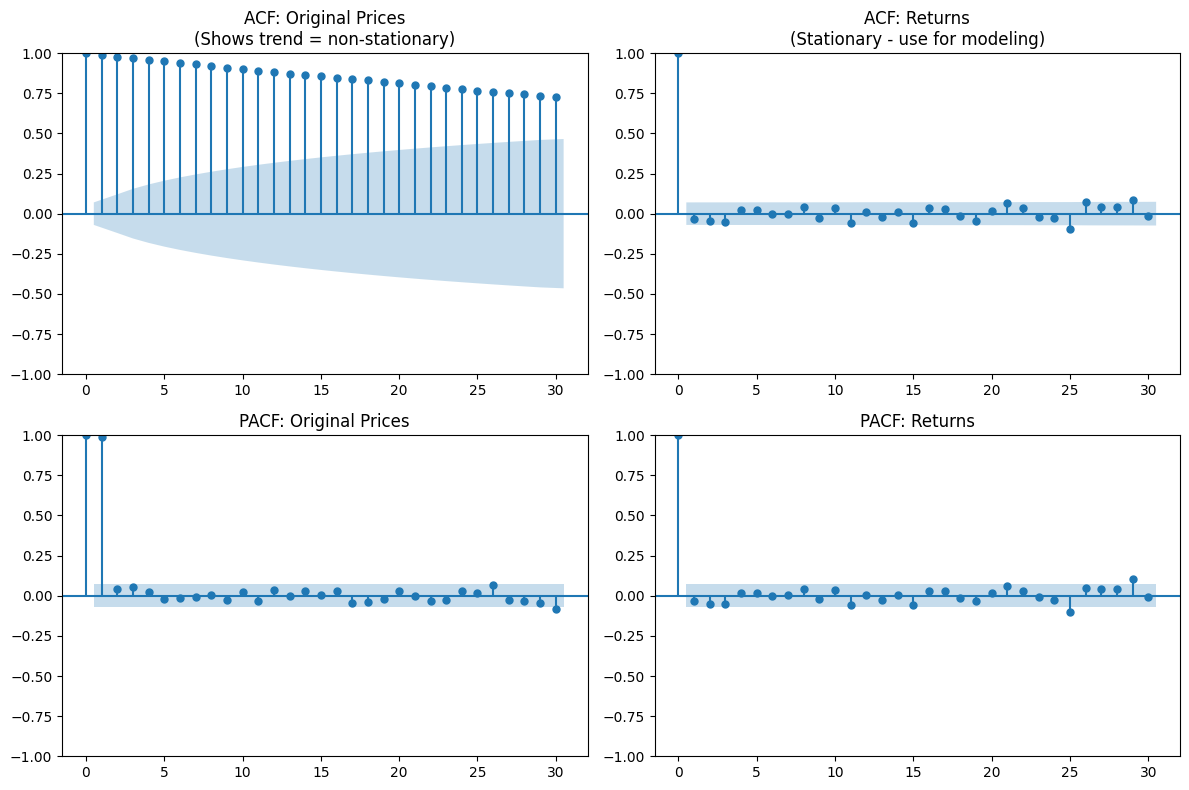

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# CORRECT: Convert to Series first
prices_series = prices.squeeze()

# Calculate returns (stationary)
returns = prices_series.pct_change().dropna()

# Plot ACF and PACF
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Price ACF (non-stationary - shows trend)
plot_acf(prices_series, lags=30, ax=axes[0, 0], 
         title='ACF: Original Prices\n(Shows trend = non-stationary)')

# Returns ACF (stationary - shows true correlation)
plot_acf(returns, lags=30, ax=axes[0, 1],
         title='ACF: Returns\n(Stationary - use for modeling)')

# Price PACF
plot_pacf(prices_series, lags=30, ax=axes[1, 0],
          title='PACF: Original Prices')

# Returns PACF  
plot_pacf(returns, lags=30, ax=axes[1, 1],
          title='PACF: Returns')

plt.tight_layout()
plt.show()

Key Insight for EUR/USD:

Original prices show high autocorrelation (trend persists)
Returns show weak autocorrelation (near-random daily moves)
This tells us: Predicting tomorrow's exact price is hard, but predicting direction might be possible

In [11]:
print("Type of 'eurusd':", type(eurusd))
print("Columns in eurusd:", eurusd.columns.tolist())
print("\nFirst 5 rows:")
print(eurusd.head())

# FIX: When downloading from yfinance, you get a DataFrame
# You need to select a specific column (like 'Close')
prices = eurusd['Close']  # This is a Series

print("\n" + "="*60)
print("Type of 'prices':", type(prices))
print("prices head:")
print(prices.head())

Type of 'eurusd': <class 'pandas.core.frame.DataFrame'>
Columns in eurusd: [('Close', 'EURUSD=X'), ('High', 'EURUSD=X'), ('Low', 'EURUSD=X'), ('Open', 'EURUSD=X'), ('Volume', 'EURUSD=X')]

First 5 rows:
Price          Close      High       Low      Open   Volume
Ticker      EURUSD=X  EURUSD=X  EURUSD=X  EURUSD=X EURUSD=X
Date                                                       
2022-12-13  1.054174  1.066894  1.052931  1.054174        0
2022-12-14  1.062665  1.066985  1.062011  1.062665        0
2022-12-15  1.067635  1.072559  1.060738  1.067635        0
2022-12-16  1.064056  1.066325  1.059940  1.064056        0
2022-12-19  1.058504  1.065900  1.057720  1.058504        0

Type of 'prices': <class 'pandas.core.frame.DataFrame'>
prices head:
Ticker      EURUSD=X
Date                
2022-12-13  1.054174
2022-12-14  1.062665
2022-12-15  1.067635
2022-12-16  1.064056
2022-12-19  1.058504


In [12]:
# Now these will work:
# Method 1: Differencing
prices_diff = prices.diff().dropna()

# Method 2: Percentage change
returns = prices.pct_change().dropna() * 100  # In percentage

print("\n" + "="*60)
print("PRICES DIFFERENCE (prices_diff):")
print(prices_diff.head())

print("\n" + "="*60)
print("DAILY RETURNS (returns):")
print(returns.head())


PRICES DIFFERENCE (prices_diff):
Ticker      EURUSD=X
Date                
2022-12-14  0.008491
2022-12-15  0.004969
2022-12-16 -0.003579
2022-12-19 -0.005553
2022-12-20  0.002955

DAILY RETURNS (returns):
Ticker      EURUSD=X
Date                
2022-12-14  0.805502
2022-12-15  0.467632
2022-12-16 -0.335184
2022-12-19 -0.521838
2022-12-20  0.279164


Converted to Series. New type: <class 'pandas.core.series.Series'>


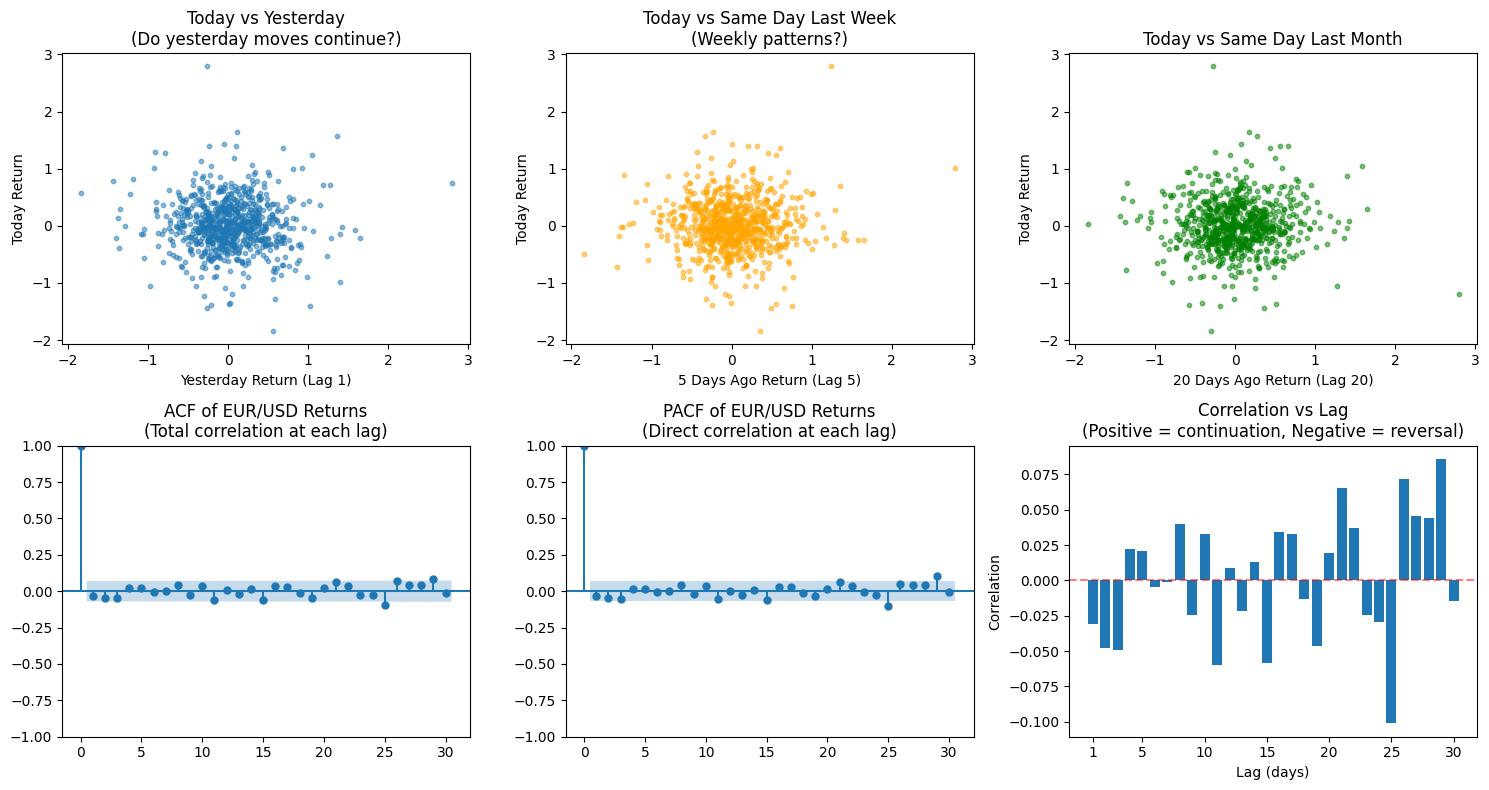

In [13]:
# If it's a DataFrame, you need to extract the column
if isinstance(returns, pd.DataFrame):
    # If it has only one column, get that column
    if len(returns.columns) == 1:
        returns_series = returns.iloc[:, 0]  # Get first column as Series
    else:
        # If it has multiple columns, select the returns column
        returns_series = returns['returns']  # Or whatever your column name is
    
    print(f"Converted to Series. New type: {type(returns_series)}")
else:
    returns_series = returns

# Plot correlation values
lags = range(1, 31)
# Now use returns_series for autocorrelation
returns_correlations = [returns_series.autocorr(lag=l) for l in lags]

# Look at different lags for EUR/USD
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Plot 1: Today vs Yesterday (Lag 1)
axes[0, 0].scatter(returns_series.shift(1), returns_series, alpha=0.5, s=10)
axes[0, 0].set_xlabel('Yesterday Return (Lag 1)')
axes[0, 0].set_ylabel('Today Return')
axes[0, 0].set_title('Today vs Yesterday\n(Do yesterday moves continue?)')

# Plot 2: Today vs 5 days ago (Lag 5 - weekly pattern)
axes[0, 1].scatter(returns_series.shift(5), returns_series, alpha=0.5, s=10, color='orange')
axes[0, 1].set_xlabel('5 Days Ago Return (Lag 5)')
axes[0, 1].set_ylabel('Today Return')
axes[0, 1].set_title('Today vs Same Day Last Week\n(Weekly patterns?)')

# Plot 3: Today vs 20 days ago (Lag 20 - monthly)
axes[0, 2].scatter(returns_series.shift(20), returns_series, alpha=0.5, s=10, color='green')
axes[0, 2].set_xlabel('20 Days Ago Return (Lag 20)')
axes[0, 2].set_ylabel('Today Return')
axes[0, 2].set_title('Today vs Same Day Last Month')

# Plot ACF (Autocorrelation Function)
plot_acf(returns_series, lags=30, ax=axes[1, 0], title='ACF of EUR/USD Returns\n(Total correlation at each lag)')

# Plot PACF (Partial Autocorrelation Function)
plot_pacf(returns_series, lags=30, ax=axes[1, 1], title='PACF of EUR/USD Returns\n(Direct correlation at each lag)')

# # Plot correlation values
axes[1, 2].bar(lags, returns_correlations)
axes[1, 2].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[1, 2].set_xlabel('Lag (days)')
axes[1, 2].set_ylabel('Correlation')
axes[1, 2].set_title('Correlation vs Lag\n(Positive = continuation, Negative = reversal)')
axes[1, 2].set_xticks([1, 5, 10, 15, 20, 25, 30])

plt.tight_layout()
plt.show()

In [14]:
# Check what we really have
print(f"Type of 'prices': {type(prices)}")
print(f"Columns: {prices.columns.tolist()}")

# Convert to Series properly
if isinstance(prices, pd.DataFrame):
    # Get the first (and only) column
    prices_series = prices.iloc[:, 0]
    # OR: prices_series = prices.squeeze()  # This converts DataFrame to Series
else:
    prices_series = prices

print(f"\n✓ Converted to Series")
print(f"✓ Type: {type(prices_series)}")
print(f"✓ Shape: {prices_series.shape}")
print(f"✓ First 3 values: {prices_series.head(3).tolist()}")

Type of 'prices': <class 'pandas.core.frame.DataFrame'>
Columns: ['EURUSD=X']

✓ Converted to Series
✓ Type: <class 'pandas.core.series.Series'>
✓ Shape: (781,)
✓ First 3 values: [1.0541739463806152, 1.062665343284607, 1.0676347017288208]


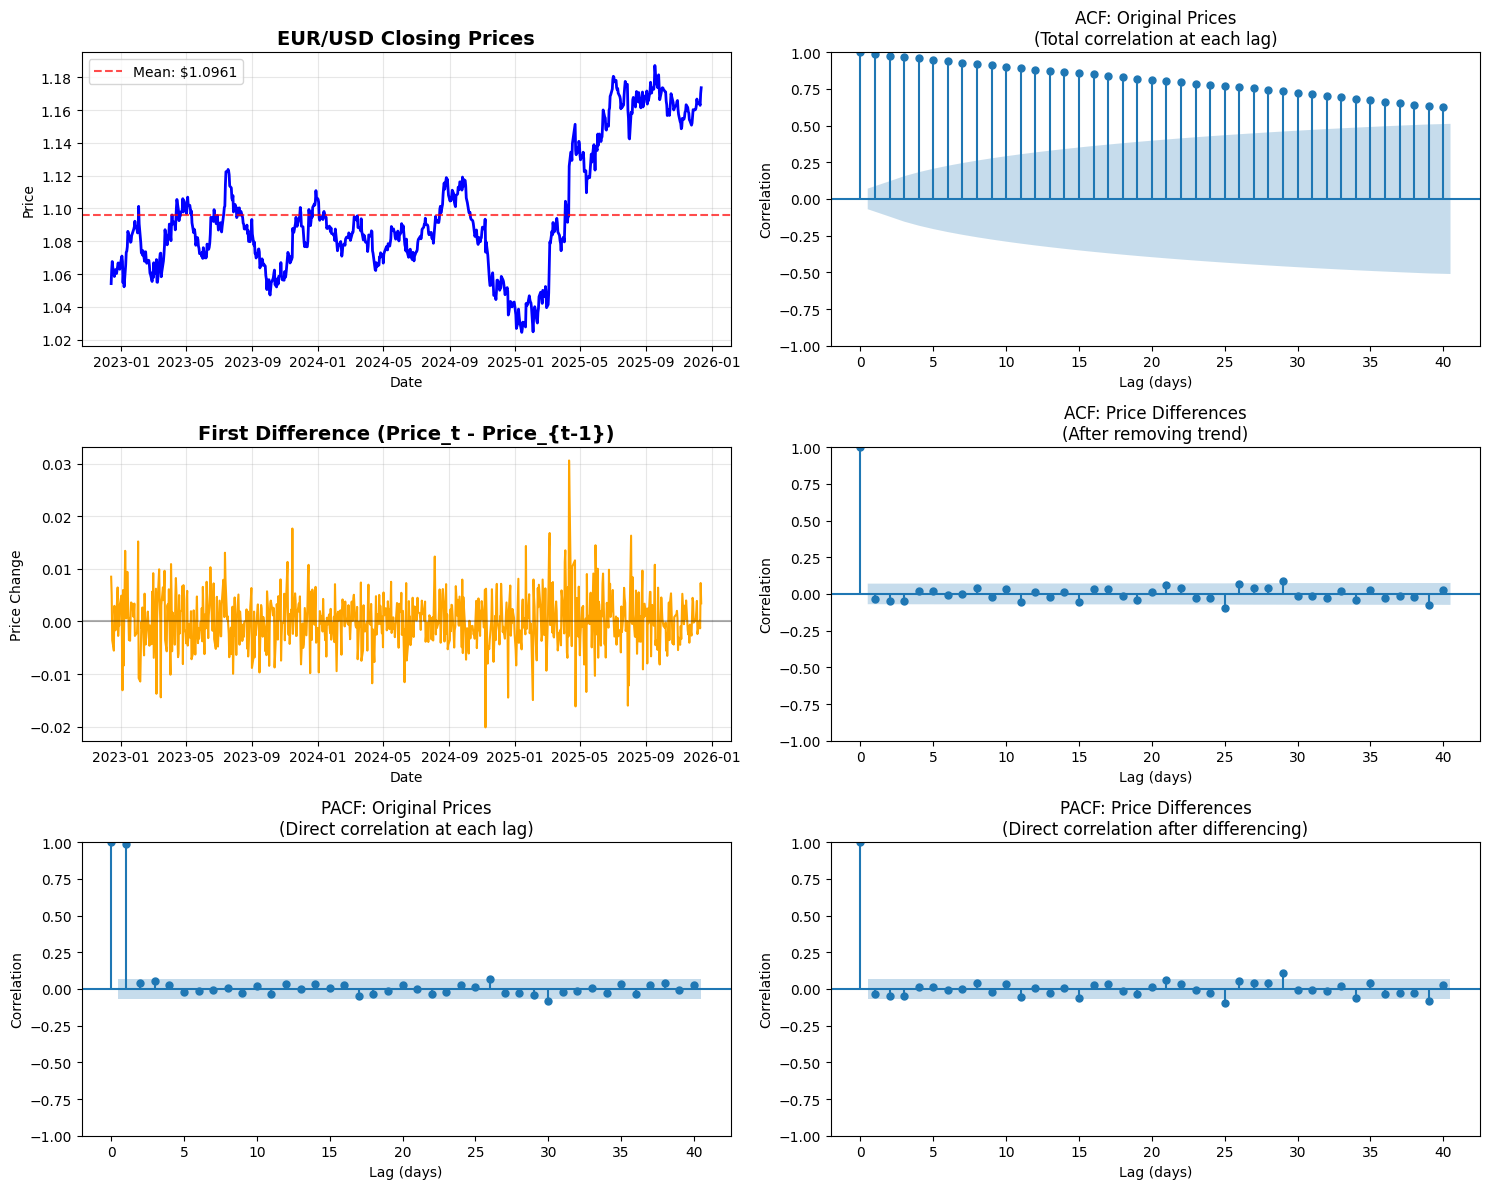

In [15]:

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# ============================================
# PLOT 1: ORIGINAL PRICE SERIES
# ============================================
axes[0, 0].plot(prices_series, color='blue', linewidth=2)
axes[0, 0].set_title('EUR/USD Closing Prices', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price')
axes[0, 0].grid(True, alpha=0.3)

# Add statistics
mean_price = prices_series.mean()
axes[0, 0].axhline(y=mean_price, color='red', linestyle='--', alpha=0.7, 
                   label=f'Mean: ${mean_price:.4f}')
axes[0, 0].legend()

# ============================================
# PLOT 2: ACF OF ORIGINAL PRICES
# ============================================
plot_acf(prices_series, lags=40, ax=axes[0, 1], title='ACF: Original Prices\n(Total correlation at each lag)')
axes[0, 1].set_xlabel('Lag (days)')
axes[0, 1].set_ylabel('Correlation')

# ============================================
# PLOT 3: PRICE DIFFERENCES (First Difference)
# ============================================
price_diff = prices_series.diff().dropna()
axes[1, 0].plot(price_diff, color='orange', linewidth=1.5)
axes[1, 0].set_title('First Difference (Price_t - Price_{t-1})', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Price Change')
axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1, 0].grid(True, alpha=0.3)

# ============================================
# PLOT 4: ACF OF PRICE DIFFERENCES
# ============================================
plot_acf(price_diff, lags=40, ax=axes[1, 1], title='ACF: Price Differences\n(After removing trend)')
axes[1, 1].set_xlabel('Lag (days)')
axes[1, 1].set_ylabel('Correlation')

# ============================================
# PLOT 5: PACF OF ORIGINAL PRICES
# ============================================
plot_pacf(prices_series, lags=40, ax=axes[2, 0], title='PACF: Original Prices\n(Direct correlation at each lag)')
axes[2, 0].set_xlabel('Lag (days)')
axes[2, 0].set_ylabel('Correlation')

# ============================================
# PLOT 6: PACF OF PRICE DIFFERENCES
# ============================================
plot_pacf(price_diff, lags=40, ax=axes[2, 1], title='PACF: Price Differences\n(Direct correlation after differencing)')
axes[2, 1].set_xlabel('Lag (days)')
axes[2, 1].set_ylabel('Correlation')

plt.tight_layout()
plt.show()

## 7. ARIMA Model

Analogy: ARIMA is like a smart combination of:

AR (AutoRegressive): "Today's price is similar to yesterday's"
I (Integrated): "We're looking at differences/changes, not absolute values"
MA (Moving Average): "Today's price depends on yesterday's prediction error"
ARIMA(p, d, q) parameters:

p: How many past values to use (from PACF plot)
d: How many times to difference (usually 1 for prices, 0 for returns)
q: How many past errors to use (from ACF plot)

---

ARIMA = AutoRegressive Integrated Moving Average

- AR(p): Uses p past values to predict future
- I(d): Differences data d times to make it stationary
- MA(q): Uses q past forecast errors

How to Choose Parameters for EUR/USD:

1. d (differencing): Use 1 for prices, 0 for returns (returns are already stationary)
2. p (AR terms): Look at PACF plot - where it cuts off
3. q (MA terms): Look at ACF plot - where it cuts off

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# CORRECT: Use Series, not DataFrame
prices_series = prices.squeeze()

# Use RETURNS (already stationary)
returns = prices_series.pct_change().dropna()

# Split data
train_size = int(len(returns) * 0.8)
train = returns[:train_size]
test = returns[train_size:]

# Fit ARIMA model (p,d,q) = (1,0,1) is a good start for returns
model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluate
mae = mean_absolute_error(test, forecast)
print(f"Mean Absolute Error: {mae:.6f}")

# Convert back to prices for trading
current_price = prices_series.iloc[train_size]
predicted_returns = forecast.values
predicted_prices = [current_price]

for ret in predicted_returns:
    next_price = predicted_prices[-1] * (1 + ret)
    predicted_prices.append(next_price)

Mean Absolute Error: 0.003230


/Users/guillermo/venvs/venv_eurusd/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/guillermo/venvs/venv_eurusd/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/guillermo/venvs/venv_eurusd/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/guillermo/venvs/venv_eurusd/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be g

ADF p-value: 0.000000
✓ Returns are stationary - good for modeling


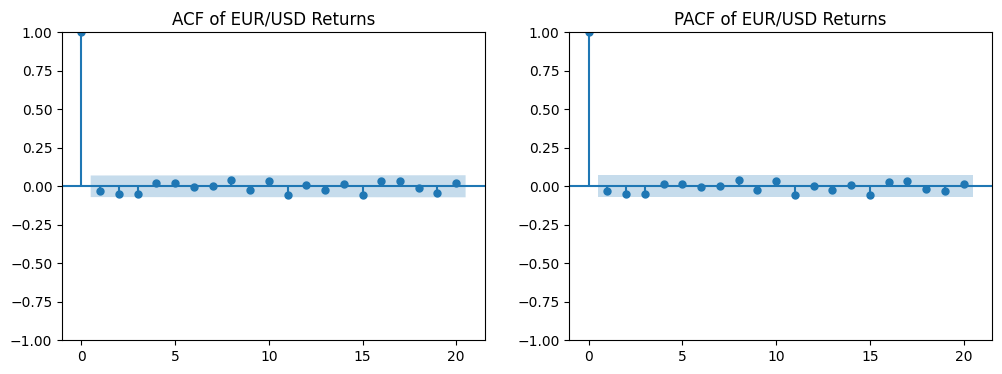

/Users/guillermo/venvs/venv_eurusd/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/guillermo/venvs/venv_eurusd/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/guillermo/venvs/venv_eurusd/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/guillermo/venvs/venv_eurusd/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be g

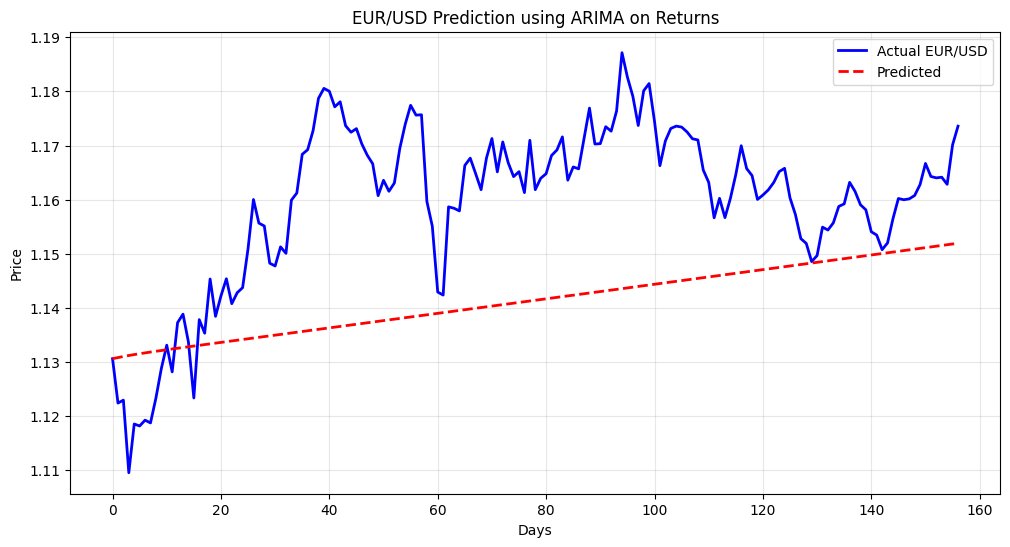

In [17]:
# EUR/USD PREDICTION PIPELINE (CORRECTED VERSION)
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. DOWNLOAD DATA
# eurusd = yf.download('EURUSD=X', start='2023-01-01', end='2024-12-31')

# 2. EXTRACT PRICES AS SERIES
# prices = eurusd['Close'].squeeze()  # ← KEY: Convert to Series

# 3. CALCULATE RETURNS
returns = prices.pct_change().dropna()

# 4. CHECK STATIONARITY
adf_result = adfuller(returns)
print(f"ADF p-value: {adf_result[1]:.6f}")
if adf_result[1] < 0.05:
    print("✓ Returns are stationary - good for modeling")

# 5. ANALYZE AUTOCORRELATION
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(returns, lags=20, ax=ax1, title='ACF of EUR/USD Returns')
plot_pacf(returns, lags=20, ax=ax2, title='PACF of EUR/USD Returns')
plt.show()

# 6. BUILD ARIMA MODEL
train_size = int(len(returns) * 0.8)
train = returns[:train_size]
test = returns[train_size:]

# Start with simple model: ARIMA(1,0,1)
model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()

# 7. MAKE PREDICTIONS
forecast_returns = model_fit.forecast(steps=len(test))

# 8. CONVERT TO PRICES
current_price = prices.iloc[train_size]
predicted_prices = [current_price]
for ret in forecast_returns:
    next_price = predicted_prices[-1] * (1 + ret)
    predicted_prices.append(next_price)

# 9. VISUALIZE RESULTS
actual_prices = prices[train_size:].values
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, 'b-', label='Actual EUR/USD', linewidth=2)
plt.plot(predicted_prices, 'r--', label='Predicted', linewidth=2)
plt.title('EUR/USD Prediction using ARIMA on Returns')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [18]:

# # Simple, clean ARIMA example
# eurusd = yf.download('EURUSD=X', period='3mo', progress=False)
# prices = eurusd['Close'].squeeze()

# Use returns
returns = prices_series.pct_change().dropna()

# Fit ARIMA without printing summary (quieter)
model = ARIMA(returns, order=(1, 0, 1))
model_fit = model.fit()

# Predict next 5 days
forecast = model_fit.forecast(steps=5)

print("ARIMA Model Predictions for EUR/USD:")
print("="*40)
print(f"Current price: {prices_series.iloc[-1]:.4f}")
print("\nPredicted daily returns for next 5 days:")
for i, ret in enumerate(forecast, 1):
    print(f"  Day {i}: {ret:.4%}")

# Convert to prices
current_price = prices_series.iloc[-1]
predicted_prices = [current_price]
for ret in forecast:
    predicted_prices.append(predicted_prices[-1] * (1 + ret))

print("\nPredicted EUR/USD prices:")
for i, prices_series in enumerate(predicted_prices[1:], 1):
    change = (prices_series - current_price) / current_price * 100
    print(f"  Day {i}: {prices_series:.4f} ({change:+.2f}% from current)")

ARIMA Model Predictions for EUR/USD:
Current price: 1.1736

Predicted daily returns for next 5 days:
  Day 1: 0.0145%
  Day 2: 0.0145%
  Day 3: 0.0145%
  Day 4: 0.0145%
  Day 5: 0.0145%

Predicted EUR/USD prices:
  Day 1: 1.1737 (+0.01% from current)
  Day 2: 1.1739 (+0.03% from current)
  Day 3: 1.1741 (+0.04% from current)
  Day 4: 1.1743 (+0.06% from current)
  Day 5: 1.1744 (+0.07% from current)


/Users/guillermo/venvs/venv_eurusd/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/guillermo/venvs/venv_eurusd/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/guillermo/venvs/venv_eurusd/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/guillermo/venvs/venv_eurusd/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. U

# Auto ARIMA

## 1. Using AutoARIMA to Find Best Parameters

- The basic ARIMA(1,0,1) model IS terrible for EUR/USD - it's too simple
- Yes, you need to forecast iteratively for multi-step predictions

In [19]:
# Install pmdarima first if needed
# !pip install pmdarima

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

# Get EUR/USD data
# print("Downloading EUR/USD data...")
# eurusd = yf.download('EURUSD=X', start='2023-01-01', end='2024-01-10', progress=False)
series_prices = eurusd['Close'].squeeze()

# Calculate returns (stationary)
returns = series_prices.pct_change().dropna()

print(f"Data: {len(returns)} daily returns")
print(f"Date range: {returns.index[0].date()} to {returns.index[-1].date()}")

# Use auto_arima to find optimal parameters
print("\n" + "="*60)
print("AUTOARIMA SEARCH FOR BEST PARAMETERS")
print("="*60)

# AutoARIMA will test many combinations
auto_model = auto_arima(
    returns,
    start_p=0,      # Minimum p (AR terms)
    start_q=0,      # Minimum q (MA terms)
    max_p=5,        # Maximum p
    max_q=5,        # Maximum q
    d=0,            # Differencing (0 because returns are already stationary)
    seasonal=False, # No seasonality for daily forex
    trace=True,     # Show progress
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True   # Faster search
)

print("\n" + "="*60)
print("BEST MODEL FOUND BY AUTOARIMA:")
print("="*60)
print(f"Order (p,d,q): {auto_model.order}")
print(f"AIC: {auto_model.aic():.2f}")
print(f"BIC: {auto_model.bic():.2f}")

# Summary of the best model
print("\nModel Summary:")
print(auto_model.summary())

# Use the best parameters to create a proper ARIMA model
from statsmodels.tsa.arima.model import ARIMA

best_order = auto_model.order
print(f"\nUsing best order: ARIMA{best_order}")

# Split data
train_size = int(len(returns) * 0.8)
train = returns[:train_size]
test = returns[train_size:]

# Fit with best parameters
model = ARIMA(train, order=best_order)
model_fit = model.fit()

Data: 780 daily returns
Date range: 2022-12-14 to 2025-12-12

AUTOARIMA SEARCH FOR BEST PARAMETERS
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-6201.072, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-6199.755, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-6199.825, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-6197.071, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-6199.900, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.124 seconds

BEST MODEL FOUND BY AUTOARIMA:
Order (p,d,q): (0, 0, 0)
AIC: -6201.07
BIC: -6196.41

Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  780
Model:                        SARIMAX   Log Likelihood                3101.536
Date:                Fri, 12 Dec 2025   AIC                          -6201.072
Time:                        

## 2. ITERATIVE FORECASTING (WALK-FORWARD VALIDATION)

This is CRITICAL for time series! You can't just forecast 30 days at once - you need to forecast one day, add it to history, forecast next day, etc.



ITERATIVE FORECASTING (Walk-Forward)
Running iterative forecasting...
Running direct forecasting (wrong way for comparison)...

ERROR COMPARISON:
Iterative forecasting MAE: 0.003232 (0.323%)
Direct forecasting MAE:    0.003230 (0.323%)
Improvement: -0.1% better


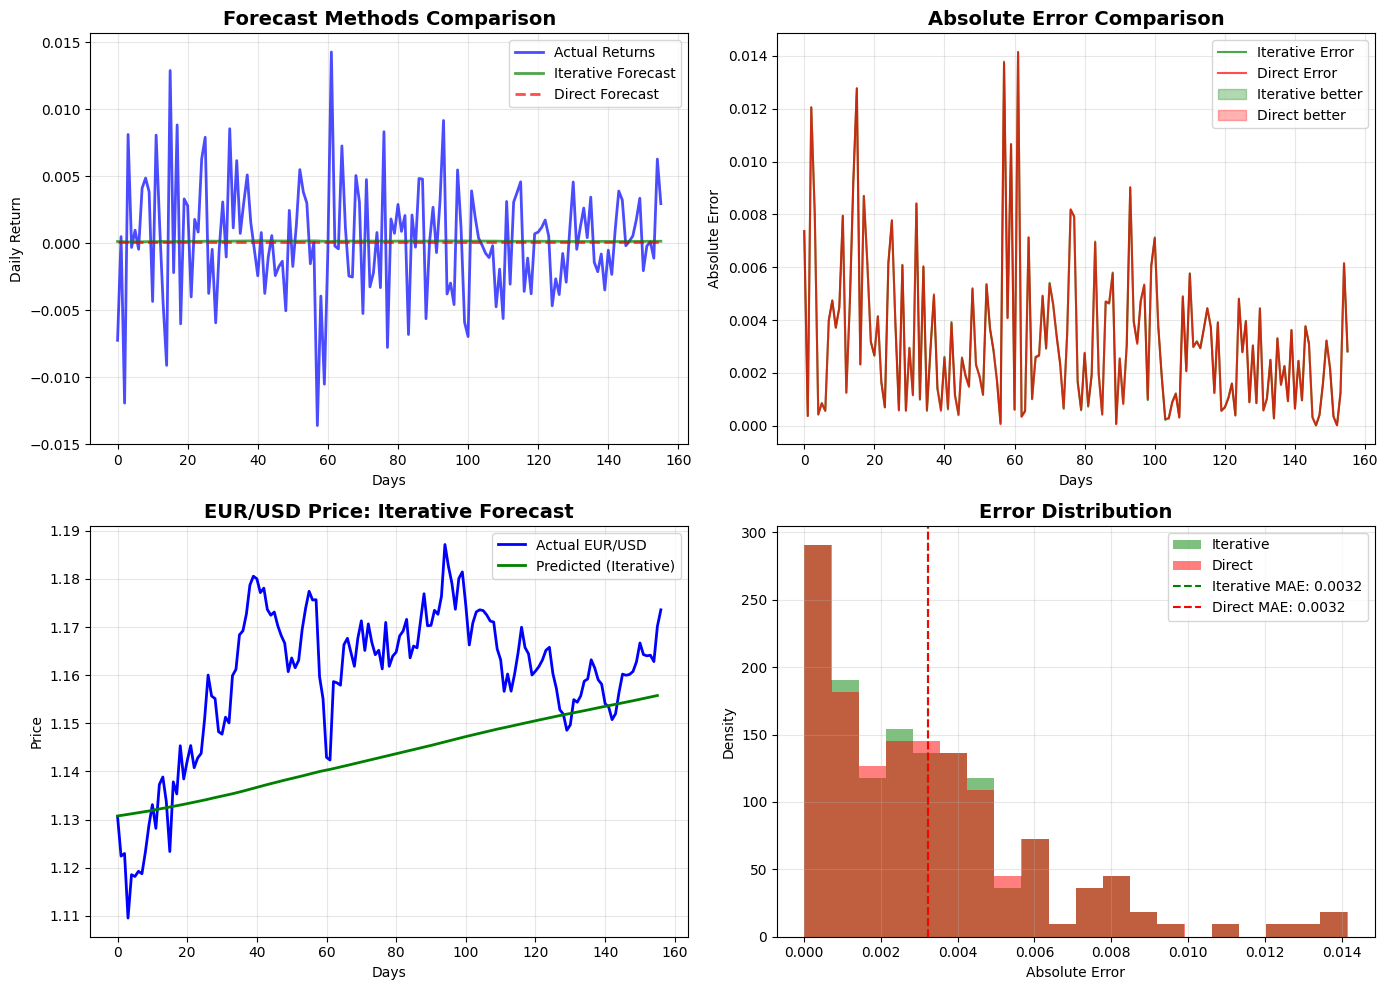

In [20]:
# ITERATIVE FORECASTING (WALK-FORWARD VALIDATION)
print("\n" + "="*60)
print("ITERATIVE FORECASTING (Walk-Forward)")
print("="*60)

# Method 1: Manual iterative forecasting
def iterative_forecast_arima(train_data, test_data, order, steps_ahead=1):
    """
    Forecast iteratively: predict one step, add to history, predict next step
    """
    history = list(train_data)
    predictions = []
    
    for i in range(len(test_data)):
        # Fit model on current history
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        
        # Forecast next 'steps_ahead' steps
        forecast = model_fit.forecast(steps=steps_ahead)
        
        # Take the first forecast
        predictions.append(forecast[0])  # Use index [0] for numpy array

        # Add actual value to history (simulating real-time)
        if i < len(test_data):
            history.append(test_data.iloc[i])
    
    return pd.Series(predictions, index=test_data.index)

# Run iterative forecasting
print("Running iterative forecasting...")
iterative_predictions = iterative_forecast_arima(train, test, best_order, steps_ahead=1)

# Compare with naive "direct" forecasting (wrong way)
print("Running direct forecasting (wrong way for comparison)...")
model_direct = ARIMA(train, order=best_order)
model_fit_direct = model_direct.fit()
direct_predictions = model_fit_direct.forecast(steps=len(test))

# Calculate errors
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_iterative = mean_absolute_error(test, iterative_predictions)
mae_direct = mean_absolute_error(test, direct_predictions)

print(f"\nERROR COMPARISON:")
print(f"Iterative forecasting MAE: {mae_iterative:.6f} ({mae_iterative*100:.3f}%)")
print(f"Direct forecasting MAE:    {mae_direct:.6f} ({mae_direct*100:.3f}%)")
print(f"Improvement: {((mae_direct - mae_iterative)/mae_direct*100):.1f}% better")

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Iterative vs Direct forecasts
axes[0, 0].plot(test.values, 'b-', label='Actual Returns', linewidth=2, alpha=0.7)
axes[0, 0].plot(iterative_predictions.values, 'g-', label='Iterative Forecast', linewidth=2, alpha=0.7)
axes[0, 0].plot(direct_predictions.values, 'r--', label='Direct Forecast', linewidth=2, alpha=0.7)
axes[0, 0].set_title('Forecast Methods Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Days')
axes[0, 0].set_ylabel('Daily Return')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Error comparison
error_iterative = np.abs(test.values - iterative_predictions.values)
error_direct = np.abs(test.values - direct_predictions.values)

axes[0, 1].plot(error_iterative, 'g-', label='Iterative Error', alpha=0.7)
axes[0, 1].plot(error_direct, 'r-', label='Direct Error', alpha=0.7)
axes[0, 1].fill_between(range(len(error_iterative)), 
                        error_iterative, error_direct,
                        where=(error_iterative < error_direct),
                        color='green', alpha=0.3, label='Iterative better')
axes[0, 1].fill_between(range(len(error_iterative)),
                        error_iterative, error_direct,
                        where=(error_iterative >= error_direct),
                        color='red', alpha=0.3, label='Direct better')
axes[0, 1].set_title('Absolute Error Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Days')
axes[0, 1].set_ylabel('Absolute Error')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Convert to prices (iterative)
current_price = prices.iloc[train_size]
predicted_prices_iterative = [current_price]
actual_prices_test = prices[train_size:].values

for ret in iterative_predictions.values:
    next_price = predicted_prices_iterative[-1] * (1 + ret)
    predicted_prices_iterative.append(next_price)
predicted_prices_iterative = predicted_prices_iterative[1:]

axes[1, 0].plot(actual_prices_test, 'b-', label='Actual EUR/USD', linewidth=2)
axes[1, 0].plot(predicted_prices_iterative, 'g-', label='Predicted (Iterative)', linewidth=2)
axes[1, 0].set_title('EUR/USD Price: Iterative Forecast', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Days')
axes[1, 0].set_ylabel('Price')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Error distribution
axes[1, 1].hist(error_iterative, bins=20, alpha=0.5, color='green', label='Iterative', density=True)
axes[1, 1].hist(error_direct, bins=20, alpha=0.5, color='red', label='Direct', density=True)
axes[1, 1].axvline(x=mae_iterative, color='green', linestyle='--', label=f'Iterative MAE: {mae_iterative:.4f}')
axes[1, 1].axvline(x=mae_direct, color='red', linestyle='--', label=f'Direct MAE: {mae_direct:.4f}')
axes[1, 1].set_title('Error Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Absolute Error')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Multi-Step Forecasting Strategy


In [25]:
# MULTI-STEP FORECASTING STRATEGIES
print("\n" + "="*60)
print("MULTI-STEP FORECASTING STRATEGIES")
print("="*60)

def forecast_next_n_days(data, order, n_days=5, method='iterative'):
    """
    Forecast next n days using different strategies
    """
    if method == 'iterative':
        # Strategy 1: Iterative one-step
        history = list(data)
        predictions = []
        
        for _ in range(n_days):
            model = ARIMA(history, order=order)
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=1)
            predictions.append(forecast[0])
            history.append(forecast[0])  # Use prediction for next step
        
        return predictions
    
    elif method == 'direct':
        # Strategy 2: Direct multi-step
        model = ARIMA(data, order=order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=n_days)
        return forecast.values.tolist()
    
    elif method == 'recursive':
        # Strategy 3: Recursive with retraining
        predictions = []
        history = list(data)
        
        for i in range(n_days):
            # Retrain model each time
            model = ARIMA(history, order=order)
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=1)
            predictions.append(forecast[0])
            history.append(forecast[0])
            
            # Optional: Retrain only every k steps to save time
            # if (i+1) % 3 == 0:  # Retrain every 3 days
        
        return predictions

# Test different strategies
print("\nForecasting next 5 days using different methods:")

# Use last 100 days to forecast next 5
recent_data = returns[-100:]

methods = ['iterative', 'direct', 'recursive']
results = {}

for method in methods:
    preds = forecast_next_n_days(recent_data, best_order, n_days=5, method=method)
    results[method] = preds
    
    print(f"\n{method.upper()} method:")
    for i, pred in enumerate(preds, 1):
        print(f"  Day {i}: {pred:.4%}")

# Convert to prices
current_price = series_prices.iloc[-1]
print(f"\nCurrent EUR/USD: {current_price:.4f}")
print("\nPredicted prices for next 5 days:")

for method, preds in results.items():
    print(f"\n{method.upper()} method:")
    price = current_price
    for i, ret in enumerate(preds, 1):
        price = price * (1 + ret)
        total_return = (price - current_price) / current_price * 100
        print(f"  Day {i}: {price:.4f} ({total_return:+.2f}% from now)")


MULTI-STEP FORECASTING STRATEGIES

Forecasting next 5 days using different methods:

ITERATIVE method:
  Day 1: -0.0015%
  Day 2: -0.0015%
  Day 3: -0.0014%
  Day 4: -0.0015%
  Day 5: -0.0015%

DIRECT method:
  Day 1: -0.0015%
  Day 2: -0.0015%
  Day 3: -0.0015%
  Day 4: -0.0015%
  Day 5: -0.0015%

RECURSIVE method:
  Day 1: -0.0015%
  Day 2: -0.0015%
  Day 3: -0.0014%
  Day 4: -0.0015%
  Day 5: -0.0015%

Current EUR/USD: 1.1736

Predicted prices for next 5 days:

ITERATIVE method:
  Day 1: 1.1736 (-0.00% from now)
  Day 2: 1.1735 (-0.00% from now)
  Day 3: 1.1735 (-0.00% from now)
  Day 4: 1.1735 (-0.01% from now)
  Day 5: 1.1735 (-0.01% from now)

DIRECT method:
  Day 1: 1.1736 (-0.00% from now)
  Day 2: 1.1735 (-0.00% from now)
  Day 3: 1.1735 (-0.00% from now)
  Day 4: 1.1735 (-0.01% from now)
  Day 5: 1.1735 (-0.01% from now)

RECURSIVE method:
  Day 1: 1.1736 (-0.00% from now)
  Day 2: 1.1735 (-0.00% from now)
  Day 3: 1.1735 (-0.00% from now)
  Day 4: 1.1735 (-0.01% from now)
 

## 4. Complete Pipeline with Cross-Validation




TIME SERIES CROSS-VALIDATION
Fold 1: Train size=130, Test size=130, MAE=0.003243
Fold 2: Train size=260, Test size=130, MAE=0.002710
Fold 3: Train size=390, Test size=130, MAE=0.002933
Fold 4: Train size=520, Test size=130, MAE=0.004508
Fold 5: Train size=650, Test size=130, MAE=0.002911

Average MAE across all folds: 0.003261 (0.326%)
Standard deviation: 0.000646


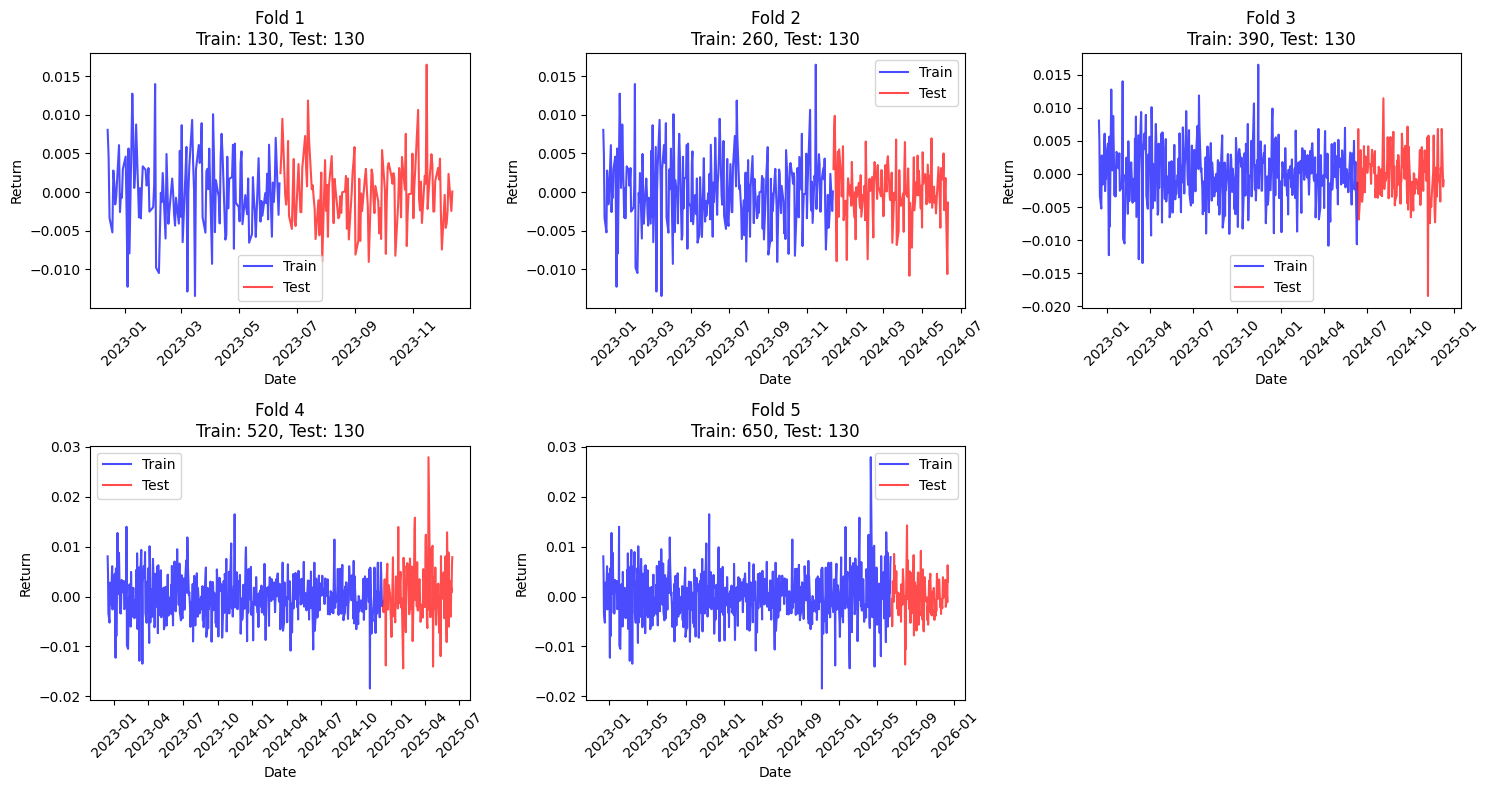

In [26]:
# COMPLETE PIPELINE WITH TIME SERIES CROSS-VALIDATION
print("\n" + "="*60)
print("TIME SERIES CROSS-VALIDATION")
print("="*60)

from sklearn.model_selection import TimeSeriesSplit

# Time series cross-validation (preserves time order!)
tscv = TimeSeriesSplit(n_splits=5)

# Store results
cv_results = []

for fold, (train_idx, test_idx) in enumerate(tscv.split(returns)):
    train_fold = returns.iloc[train_idx]
    test_fold = returns.iloc[test_idx]
    
    # Use auto_arima on each fold (or use fixed order)
    # For speed, use the best order from full data
    model = ARIMA(train_fold, order=best_order)
    model_fit = model.fit()
    
    # Iterative forecasting on test fold
    predictions = []
    history = list(train_fold)
    
    for i in range(len(test_fold)):
        model_temp = ARIMA(history, order=best_order)
        model_fit_temp = model_temp.fit()
        forecast = model_fit_temp.forecast(steps=1)
        predictions.append(forecast[0])
        history.append(test_fold.iloc[i])
    
    # Calculate error
    mae = mean_absolute_error(test_fold, predictions)
    cv_results.append(mae)
    
    print(f"Fold {fold+1}: Train size={len(train_fold)}, Test size={len(test_fold)}, MAE={mae:.6f}")

print(f"\nAverage MAE across all folds: {np.mean(cv_results):.6f} ({np.mean(cv_results)*100:.3f}%)")
print(f"Standard deviation: {np.std(cv_results):.6f}")

# Visualize cross-validation folds
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for fold, (train_idx, test_idx) in enumerate(tscv.split(returns)):
    if fold < 6:  # Show first 6 folds
        train_fold = returns.iloc[train_idx]
        test_fold = returns.iloc[test_idx]
        
        axes[fold].plot(train_fold.index, train_fold.values, 'b-', label='Train', alpha=0.7)
        axes[fold].plot(test_fold.index, test_fold.values, 'r-', label='Test', alpha=0.7)
        axes[fold].set_title(f'Fold {fold+1}\nTrain: {len(train_fold)}, Test: {len(test_fold)}')
        axes[fold].set_xlabel('Date')
        axes[fold].set_ylabel('Return')
        axes[fold].legend()
        axes[fold].tick_params(axis='x', rotation=45)

# Hide empty subplot if needed
if len(axes) > 5:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

## 5. Practical Trading Implementation




PRACTICAL TRADING STRATEGY
Generated 679 trading signals
BUY signals: 0
SELL signals: 0
HOLD signals: 679

Strategy returns calculated: 679 values


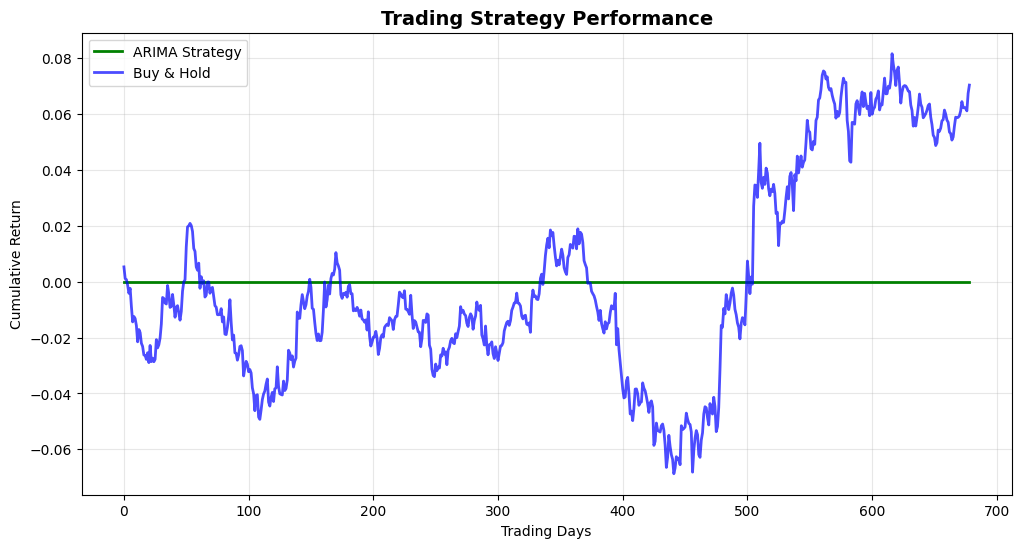


Strategy Total Return: 0.00%
Buy & Hold Total Return: 7.03%
Strategy Sharpe Ratio: nan


In [31]:
# PRACTICAL TRADING IMPLEMENTATION
print("\n" + "="*60)
print("PRACTICAL TRADING STRATEGY")
print("="*60)

# Here's the COMPLETE corrected code for Cell 5:

def trading_strategy_with_arima_simple(prices, returns, order, window=100):
    """
    Simple trading strategy using ARIMA - just generate signals
    """
    signals = []
    
    # Ensure prices is Series
    prices_series = prices.squeeze() if isinstance(prices, pd.DataFrame) else prices
    
    # FIX: Loop until len(returns)-1 to avoid index error
    for i in range(window, len(returns)-1):  # CHANGED: -1 to ensure i+1 exists
        # Train on window of data
        train_data = returns[i-window:i]
        
        try:
            # Forecast next day
            model = ARIMA(train_data, order=order)
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=1)[0]
            
            # Simple signal generation
            if forecast > 0.001:  # Predicts positive return > 0.1%
                signal = "BUY"
            elif forecast < -0.001:  # Predicts negative return < -0.1%
                signal = "SELL"
            else:
                signal = "HOLD"
                
        except Exception as e:
            # If model fails, hold
            signal = "HOLD"
        
        signals.append(signal)
    
    return signals

# Run the simple version
signals = trading_strategy_with_arima_simple(prices, returns, best_order)

print(f"Generated {len(signals)} trading signals")
print(f"BUY signals: {signals.count('BUY')}")
print(f"SELL signals: {signals.count('SELL')}")
print(f"HOLD signals: {signals.count('HOLD')}")

# Calculate strategy returns - FIXED indexing
strategy_returns = []
for i, signal in enumerate(signals):
    # i corresponds to position in signals, which starts from index 100
    actual_returns_idx = 100 + i + 1  # +1 because we're predicting next day
    
    if actual_returns_idx < len(returns):
        if signal == "BUY":
            strategy_returns.append(returns.iloc[actual_returns_idx])  # Long
        elif signal == "SELL":
            strategy_returns.append(-returns.iloc[actual_returns_idx])  # Short
        else:
            strategy_returns.append(0)

print(f"\nStrategy returns calculated: {len(strategy_returns)} values")

# Convert to Series for analysis - FIXED indexing
# The returns correspond to days after the signals
strategy_index = returns.index[101:101+len(strategy_returns)]  # Start from day after first signal
strategy_returns_series = pd.Series(strategy_returns, index=strategy_index)

# Calculate cumulative returns
cumulative_strategy = np.cumsum(strategy_returns_series)

# Buy & hold for same period
buy_hold_returns = returns[101:101+len(strategy_returns)]
cumulative_buy_hold = np.cumsum(buy_hold_returns)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(cumulative_strategy.values, 'g-', label='ARIMA Strategy', linewidth=2)
plt.plot(cumulative_buy_hold.values, 'b-', label='Buy & Hold', linewidth=2, alpha=0.7)
plt.title('Trading Strategy Performance', fontsize=14, fontweight='bold')
plt.xlabel('Trading Days')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nStrategy Total Return: {cumulative_strategy.iloc[-1]*100:.2f}%")
print(f"Buy & Hold Total Return: {cumulative_buy_hold.iloc[-1]*100:.2f}%")
print(f"Strategy Sharpe Ratio: {(strategy_returns_series.mean()/strategy_returns_series.std())*np.sqrt(252):.2f}")

## 6. Simple Plot: Actual Price vs Predicted Price (Daily)



Data loaded: 781 trading days
Current EUR/USD: 1.1736

Training: 624 days
Testing:  156 days

Finding best ARIMA parameters...
Best ARIMA order: (0, 0, 0)


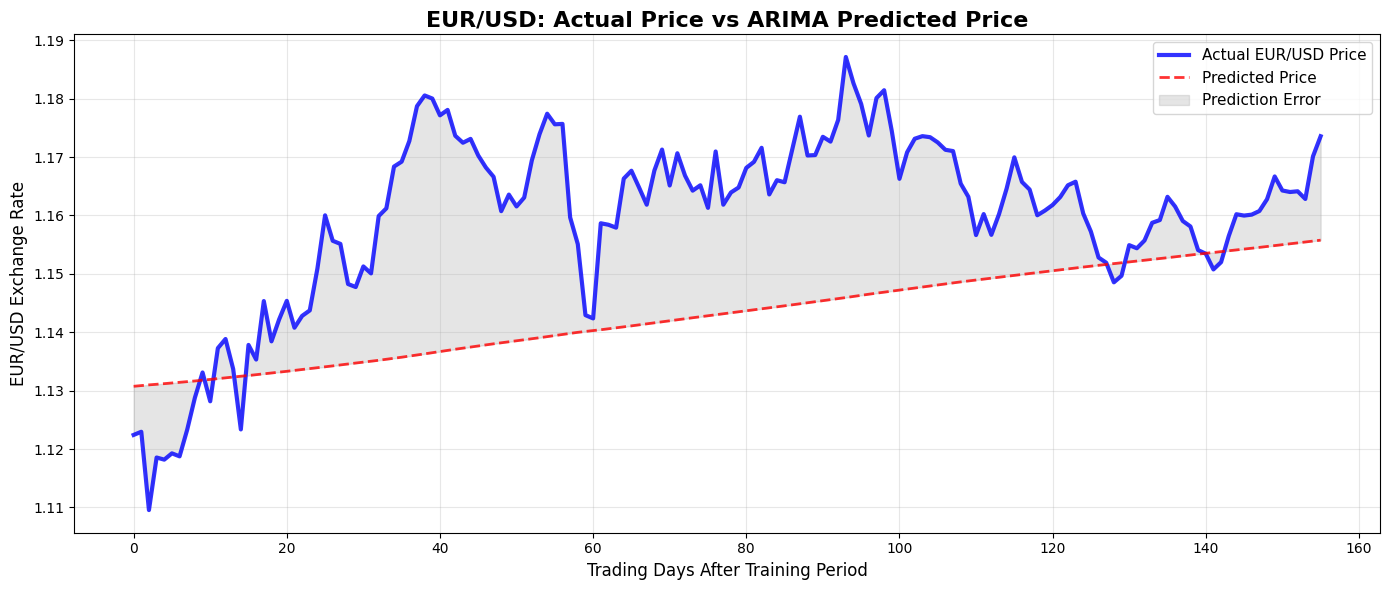


PREDICTION PERFORMANCE (Price terms):
Average error: $0.0180
Max error: $0.0442
Current prediction error: $0.0178


In [32]:
# import yfinance as yf
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# from pmdarima import auto_arima

# Get data
# eurusd = yf.download('EURUSD=X', start='2023-06-01', end='2024-01-10', progress=False)
prices = eurusd['Close'].squeeze()  # Convert to Series

print(f"Data loaded: {len(prices)} trading days")
print(f"Current EUR/USD: {prices.iloc[-1]:.4f}")

# Calculate returns (for modeling)
returns = prices.pct_change().dropna()

# Split data: Use 80% for training, 20% for testing
split_idx = int(len(returns) * 0.8)
train_returns = returns[:split_idx]
test_returns = returns[split_idx:]

print(f"\nTraining: {len(train_returns)} days")
print(f"Testing:  {len(test_returns)} days")

# Find best ARIMA model using auto_arima
print("\nFinding best ARIMA parameters...")
auto_model = auto_arima(
    train_returns,
    start_p=0, max_p=3,
    start_q=0, max_q=3,
    d=0,  # Returns are already stationary
    seasonal=False,
    trace=False,
    error_action='ignore'
)

best_order = auto_model.order
print(f"Best ARIMA order: {best_order}")

# Fit model
model = ARIMA(train_returns, order=best_order)
model_fit = model.fit()

# Predict next day returns iteratively
predicted_returns = []
history = list(train_returns)

for i in range(len(test_returns)):
    # Fit model on current history
    model_temp = ARIMA(history, order=best_order)
    model_fit_temp = model_temp.fit()
    
    # Predict next day return
    forecast_return = model_fit_temp.forecast(steps=1)[0]
    predicted_returns.append(forecast_return)
    
    # Add actual return to history
    history.append(test_returns.iloc[i])

# Convert returns back to prices
start_price = prices.iloc[split_idx]
predicted_prices = [start_price]

for ret in predicted_returns:
    next_price = predicted_prices[-1] * (1 + ret)
    predicted_prices.append(next_price)

predicted_prices = predicted_prices[1:]  # Remove starting price

# Actual prices for test period
actual_prices = prices.iloc[split_idx+1:split_idx+1+len(predicted_prices)].values

# PLOT 1: Actual vs Predicted Prices (Simple)
plt.figure(figsize=(14, 6))

# Plot actual prices
plt.plot(actual_prices, 'b-', linewidth=3, label='Actual EUR/USD Price', alpha=0.8)

# Plot predicted prices
plt.plot(predicted_prices, 'r--', linewidth=2, label='Predicted Price', alpha=0.8)

# Fill between for error visualization
plt.fill_between(range(len(actual_prices)), 
                 actual_prices, predicted_prices,
                 alpha=0.2, color='gray', label='Prediction Error')

plt.title('EUR/USD: Actual Price vs ARIMA Predicted Price', fontsize=16, fontweight='bold')
plt.xlabel('Trading Days After Training Period', fontsize=12)
plt.ylabel('EUR/USD Exchange Rate', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate error in PRICE terms (not returns)
price_errors = actual_prices - predicted_prices
print(f"\nPREDICTION PERFORMANCE (Price terms):")
print(f"Average error: ${np.mean(np.abs(price_errors)):.4f}")
print(f"Max error: ${np.max(np.abs(price_errors)):.4f}")
print(f"Current prediction error: ${price_errors[-1]:.4f}")

## 7. Plot: Next 5 Days Forecast


FORECASTING NEXT 5 DAYS
Current EUR/USD: $1.1736

Forecast for next 5 days:
Day 1: $1.1737 (+0.01%)
Day 2: $1.1739 (+0.03%)
Day 3: $1.1741 (+0.04%)
Day 4: $1.1742 (+0.06%)
Day 5: $1.1744 (+0.07%)


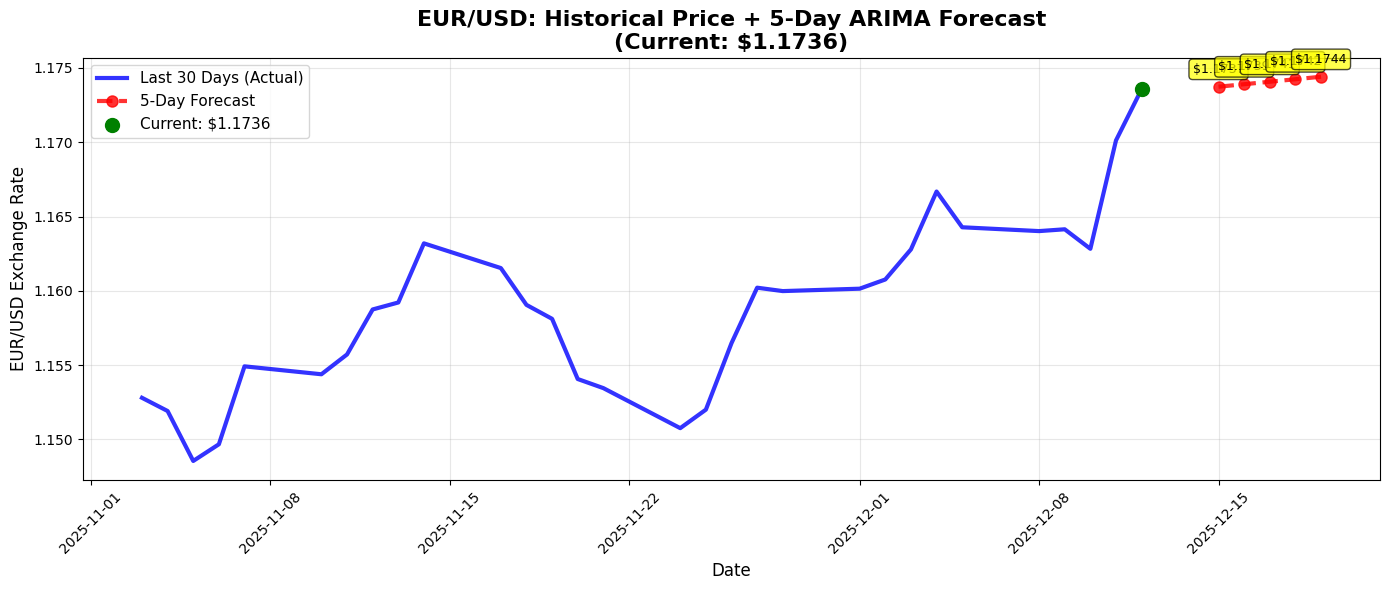

In [33]:
# Forecast next 5 days
print("\n" + "="*60)
print("FORECASTING NEXT 5 DAYS")
print("="*60)

# Use all available data to forecast future
all_returns = returns.copy()

# Fit model on all data
final_model = ARIMA(all_returns, order=best_order)
final_fit = final_model.fit()

# Forecast next 5 days returns
forecast_returns = final_fit.forecast(steps=5)

# Convert to prices
current_price = prices.iloc[-1]
future_prices = [current_price]

print(f"Current EUR/USD: ${current_price:.4f}")
print("\nForecast for next 5 days:")

for i, ret in enumerate(forecast_returns, 1):
    next_price = future_prices[-1] * (1 + ret)
    future_prices.append(next_price)
    price_change = (next_price - current_price) / current_price * 100
    print(f"Day {i}: ${next_price:.4f} ({price_change:+.2f}%)")

future_prices = future_prices[1:]  # Remove current price

# PLOT 2: Historical Price + 5-Day Forecast
plt.figure(figsize=(14, 6))

# Plot last 30 days of actual data
last_n_days = 30
historical_dates = prices.index[-last_n_days:]
historical_prices = prices[-last_n_days:].values

plt.plot(historical_dates, historical_prices, 'b-', linewidth=3, 
         label=f'Last {last_n_days} Days (Actual)', alpha=0.8)

# Create future dates (next 5 business days)
last_date = prices.index[-1]
future_dates = pd.bdate_range(start=last_date + pd.Timedelta(days=1), periods=5)

# Plot forecast
plt.plot(future_dates, future_prices, 'r--', linewidth=3, marker='o', 
         markersize=8, label='5-Day Forecast', alpha=0.8)

# Add current price marker
plt.scatter([last_date], [current_price], color='green', s=100, 
            zorder=5, label=f'Current: ${current_price:.4f}')

# Add forecast labels
for i, (date, price) in enumerate(zip(future_dates, future_prices)):
    plt.annotate(f'${price:.4f}', 
                 xy=(date, price),
                 xytext=(0, 10),
                 textcoords='offset points',
                 ha='center',
                 fontsize=9,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.title(f'EUR/USD: Historical Price + 5-Day ARIMA Forecast\n(Current: ${current_price:.4f})', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('EUR/USD Exchange Rate', fontsize=12)
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()